


##  Converting a spectrum to a colour

Knowing this wavelength of a source of light, how do we convert that into a color on the screen?

Colors are represented on computer screens by (R, G, B) values and I will follow this [blog post](https://scipython.com/blog/converting-a-spectrum-to-a-colour/). 
Let's first load the file describe the relative sensitivity of cones to the light spectrum which gives the CIE colour matching function for 380 - 780 nm in 5 nm intervals:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
adjustprops = dict(left=0.19, bottom=0.15, right=0.92, top=0.9, wspace=0., hspace=0.2)
opts = dict(ls='--', lw=5, alpha=.3)
from lambda2color import Lambda2color, xyz_from_xy

In [2]:
# a standard white:
illuminant_D65 = xyz_from_xy(0.3127, 0.3291)
# color conversion class
cs_srgb = Lambda2color(red=xyz_from_xy(0.64, 0.33),
                       green=xyz_from_xy(0.30, 0.60),
                       blue=xyz_from_xy(0.15, 0.06),
                       white=illuminant_D65)

In [3]:
cs_srgb.cmf.shape

(81, 4)

This is plotted as the different sensitivities to a novel color space called the [CIE 193 " XYZ" color space](https://en.wikipedia.org/wiki/CIE_1931_color_space) :

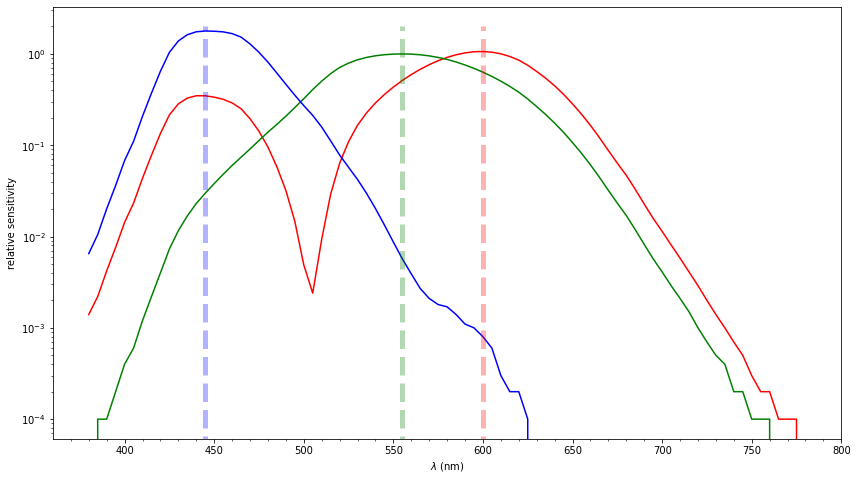

In [4]:
figsize = (15, 8)
fig, ax = plt.subplots(figsize=figsize)
wavelengths = cs_srgb.cmf[:, 0]*1e-9
fig.subplots_adjust(**adjustprops)
ax.minorticks_on()
for i_color, color in enumerate(['r', 'g', 'b']):
    ax.plot(wavelengths*1e9, cs_srgb.cmf[:, i_color+1], color=color) 
ax.vlines(445, 0, 2, colors='b', **opts)
ax.vlines(555, 0, 2, colors='g', **opts)
ax.vlines(600, 0, 2, colors='r', **opts)
ax.set_xlabel(r'$\lambda$ (nm)')
ax.set_ylabel('relative sensitivity')
#ax.set_ylim(0)
ax.set_yscale('log')

In [5]:
fig.savefig('cmf.png', dpi=250)

Such that we may obtain a RGB value fro a given wavelength, adapting code from https://scipython.com/blog/converting-a-spectrum-to-a-colour/ :

## Colors of pure wavelengths

To better understand what happens, let's render the color perceived for the spectrum of "pure" wavelengths (that is, a spectrum peaked at one wavelength):

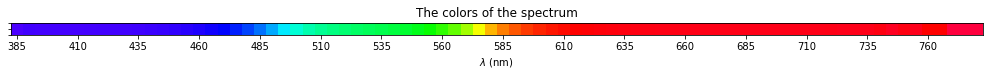

In [6]:
wavelengths = cs_srgb.cmf[1:, 0]*1e-9
N_wavelengths = len(wavelengths)
hues = np.zeros((1, N_wavelengths, 3))
for i_wavelength in range(N_wavelengths):
    spec = np.zeros((N_wavelengths+1))
    spec[i_wavelength] = 1
    hues[0, i_wavelength, :] = cs_srgb.spec_to_rgb(spec)

figsize = (15, 2)
fig, ax = plt.subplots(figsize=figsize)
adjustprops = dict(left=0.05, bottom=0.01, right=0.95, top=0.99)
fig.subplots_adjust(**adjustprops)
#ax.pcolormesh(wavelengths[:, None], np.ones((N_wavelengths, 1)), hues) 
ax.imshow(hues) 
ticks = np.arange(0, N_wavelengths, 5)
ax.set_xticks(ticks)
ax.set_xticklabels([f'{wavelengths[i]*1e9:.0f}' for i in ticks])
ax.set_yticklabels([])
ax.set_xlabel(r'$\lambda$ (nm)')
ax.set_title('The colors of the spectrum');

In [7]:
fig.savefig('spectrum.png', dpi=250, facecolor='white')

For more advanced uses, see for instance this blog post computing [the color of the sky](https://laurentperrinet.github.io/sciblog/posts/2020-07-04-colors-of-the-sky.html).

## some book keeping for the notebook

In [8]:
%load_ext watermark
%watermark -i -h -m -v -p numpy,matplotlib,lambda2color  -r -g -b

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.4.0

numpy       : 1.21.4
matplotlib  : 3.5.2
lambda2color: 0.5

Compiler    : Clang 13.1.6 (clang-1316.0.21.2)
OS          : Darwin
Release     : 21.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 36
Architecture: 64bit

Hostname: fortytwo

Git hash: d2c8c6d323529e7d9aa021e915125cad00f8f901

Git repo: https://github.com/laurentperrinet/lambda2color.git

Git branch: main

